# Business case: Prediction of Airline Prices

### Understanding the Problem Statement in this Buisness Case

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. Airlines are using sophisticated quasi-academic tactics which they call "revenue management" or "yield management". The cheapest available ticket on a given flight gets more and less expensive over time. Conventional characteristics such as distance, while still important, are no longer the only determinants of pricing structure. Economic, marketing, and sociological factors have all played a growing influence in determining flight pricing. This usually happens as an attempt to maximize revenue based on :-

- Time of purchase patterns (making sure last-minute purchases are expensive)

- Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

### Market Research

- According to a report, India’s civil aviation industry is on a high-growth trajectory. India aims to become largest aviation market by 2030. Indian domestic air traffic is expected to cross 100 million passengers by FY2017, compared to 81 million passengers in 2015, as per Centre for Asia Pacific Aviation (CAPA).

- According to Google Trends, the search term - "Cheap Air Tickets" is most searched in India. Moreover, as the middle-class of India is exposed to air travel, consumers hunting for cheap prices increases.

## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## For Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from math import sqrt

## Different Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## For Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

## For Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



In [ ]:
data=pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis


  - **Airline**: Name of all the airlines like Indigo, Jet Airways, Air India, and many more.
  - **Date_of_Journey**: The date on which the passengers journey will start.
  - **Source**: Name of the place from where the passengers journey will start.
  - **Destination**: Name of the place to where passengers wanted to travel.
  - **Route**: Route through which passengers have opted to travel from the source to their destination.
  - **Departure_Time**: Departure time is take off time for particular flight.  
  - **Arrival_Time**: Arrival time is when the passenger will reach the destination.
  - **Duration**: Total duration of flight taken to complete its journey from source to destination.
  - **Total_Stops**: Number of total places the flight will stop between source to destination.
  - **Additional_Info**: In this column, we will get information about food, kind of food, and other amenities.
  - **Price**: Price of the flight for a complete journey including all the expenses before onboarding.

## Basik Checkcs

head,tail,info,describe for both numerical and categorical

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe() # For NUmerical data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
data.describe(include='O') # For categorical data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
data.isnull().sum() ## To check any missing value

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In this data 'Route' and 'Total_Stops' have null values

# Exploratory Data Analysis

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Univariate Analysis

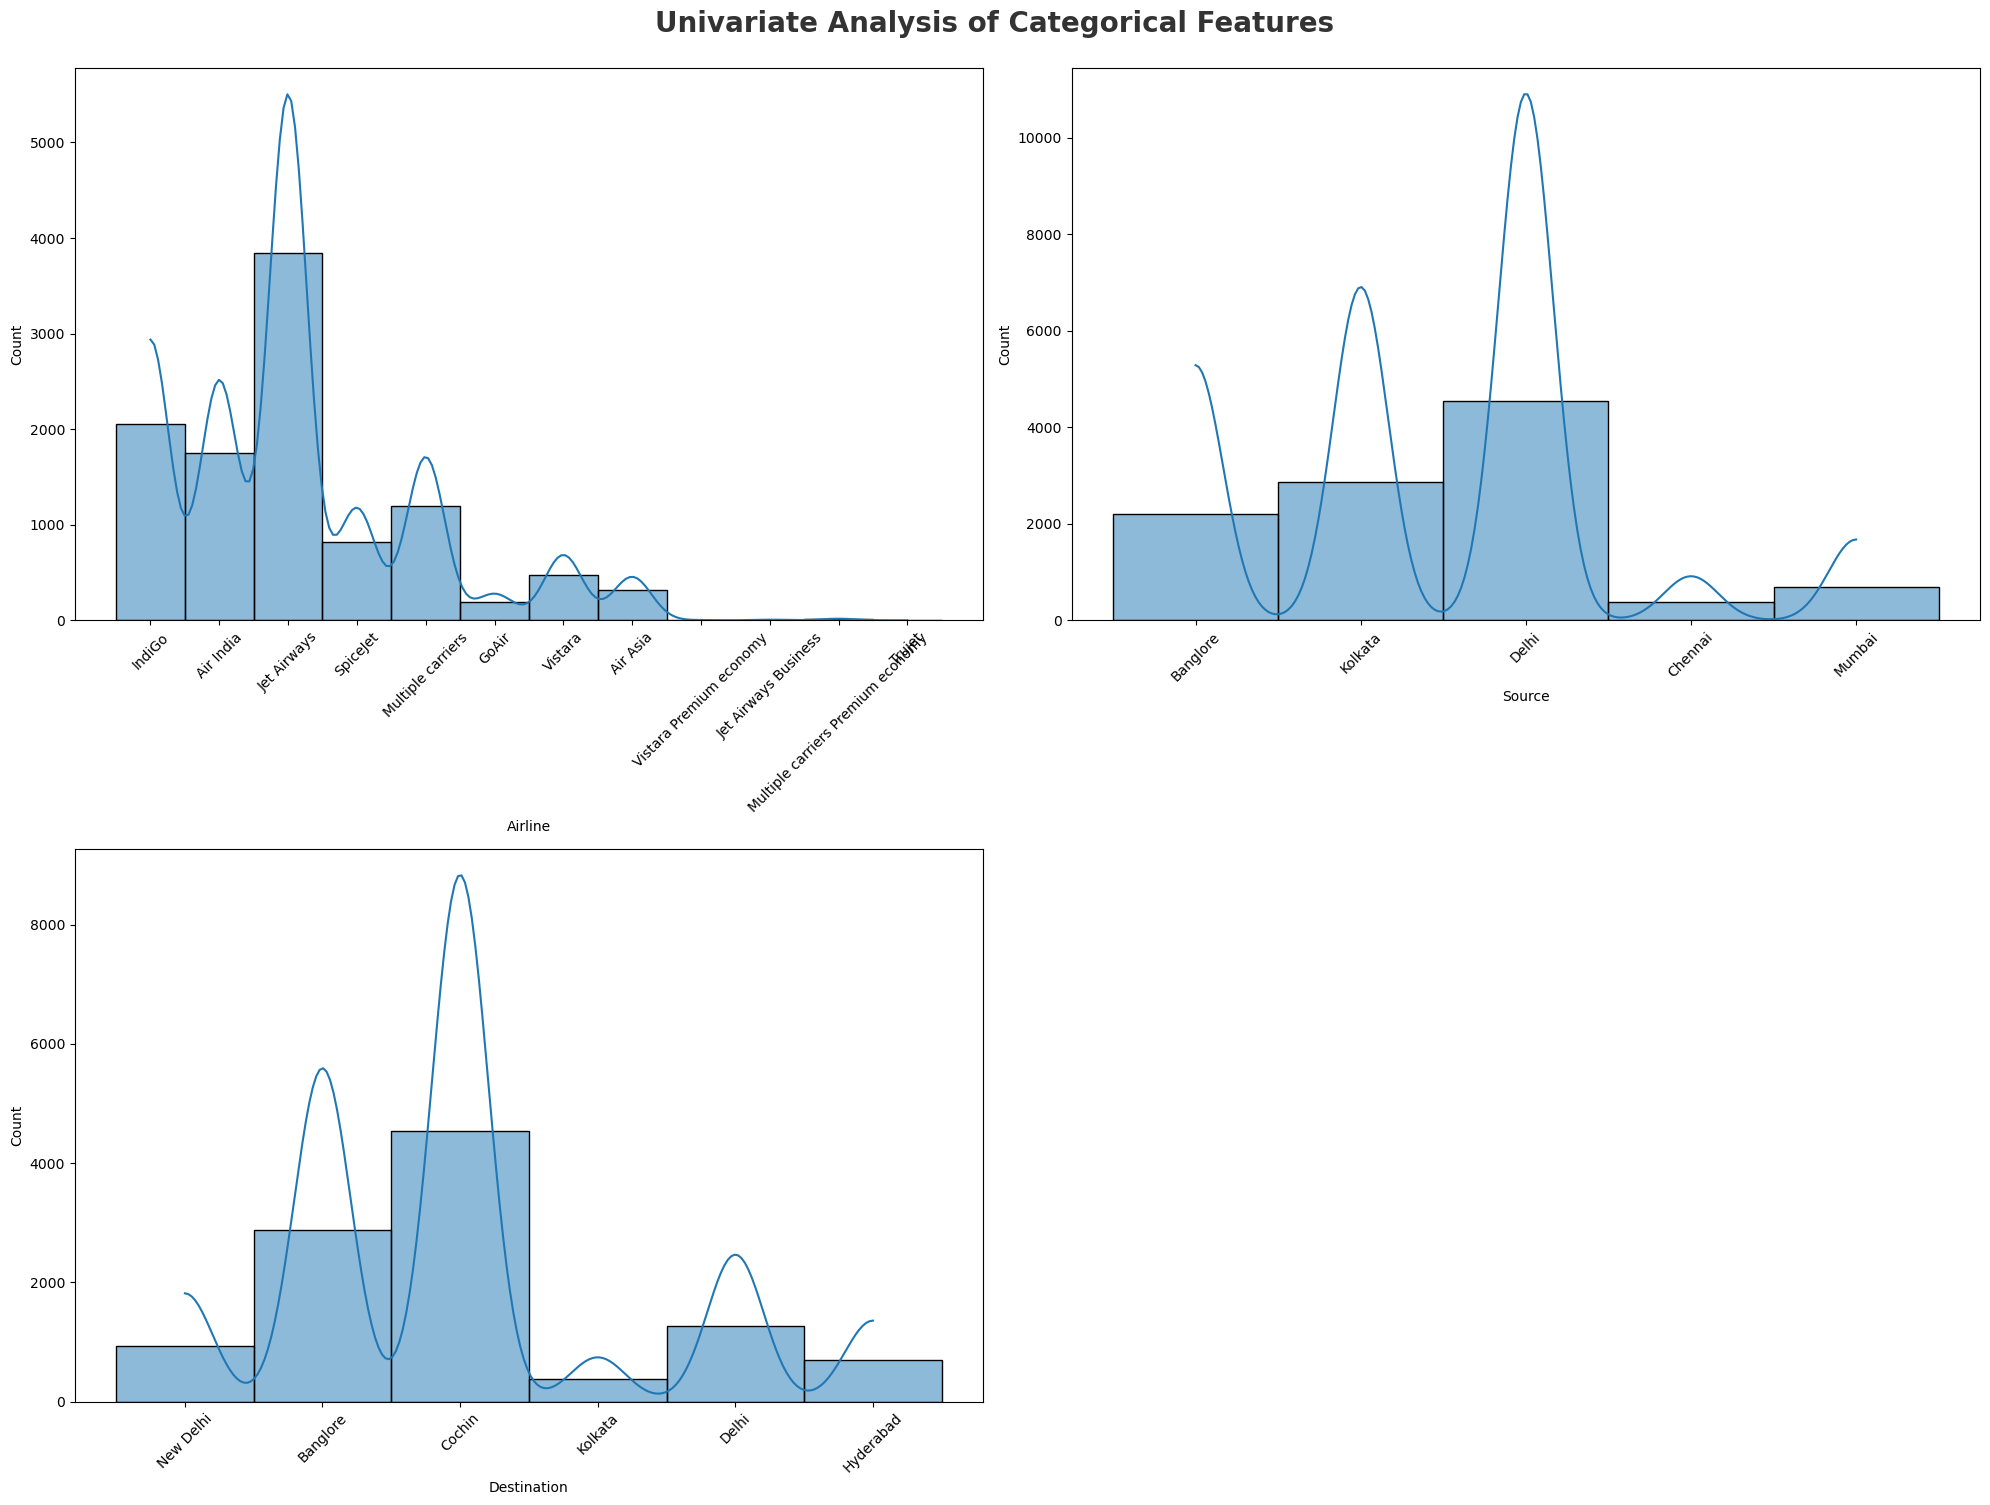

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=data[cat1[i]],kde=True)
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

- more than 35% passengers preferred jet airways.
- 80% people preferred to teavel after june
- more than 40% passangers are preferred to travel form Delhi.
- more than 40% passengers have preferred to go coachin.
- most of the people preferred one stop jounry.

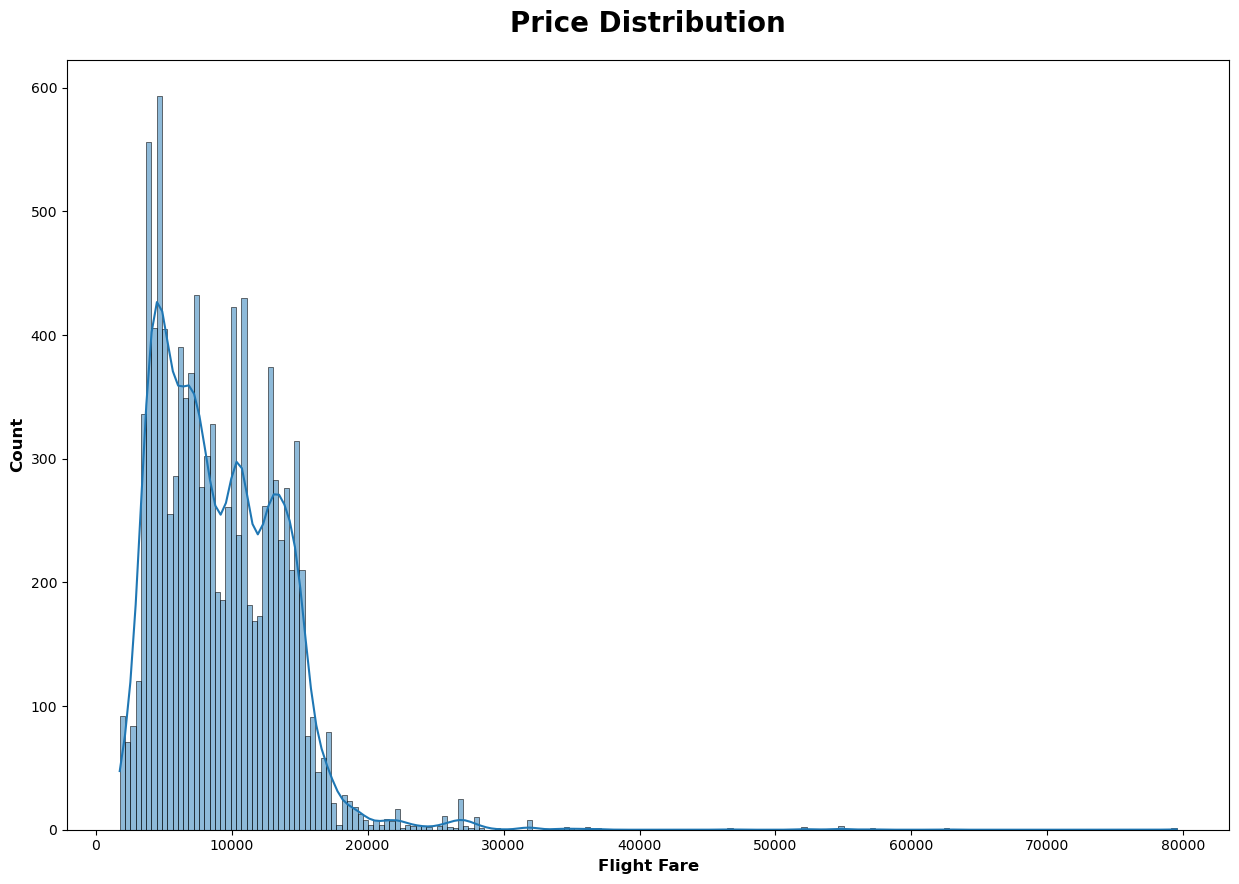

In [ ]:
plt.subplots(figsize=(15,10))
sns.histplot(data.Price, bins=200, kde=True)
plt.title("Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.show()

- From the chart it is clear that the Target Variable is Skewed

## Bivariate Analysis

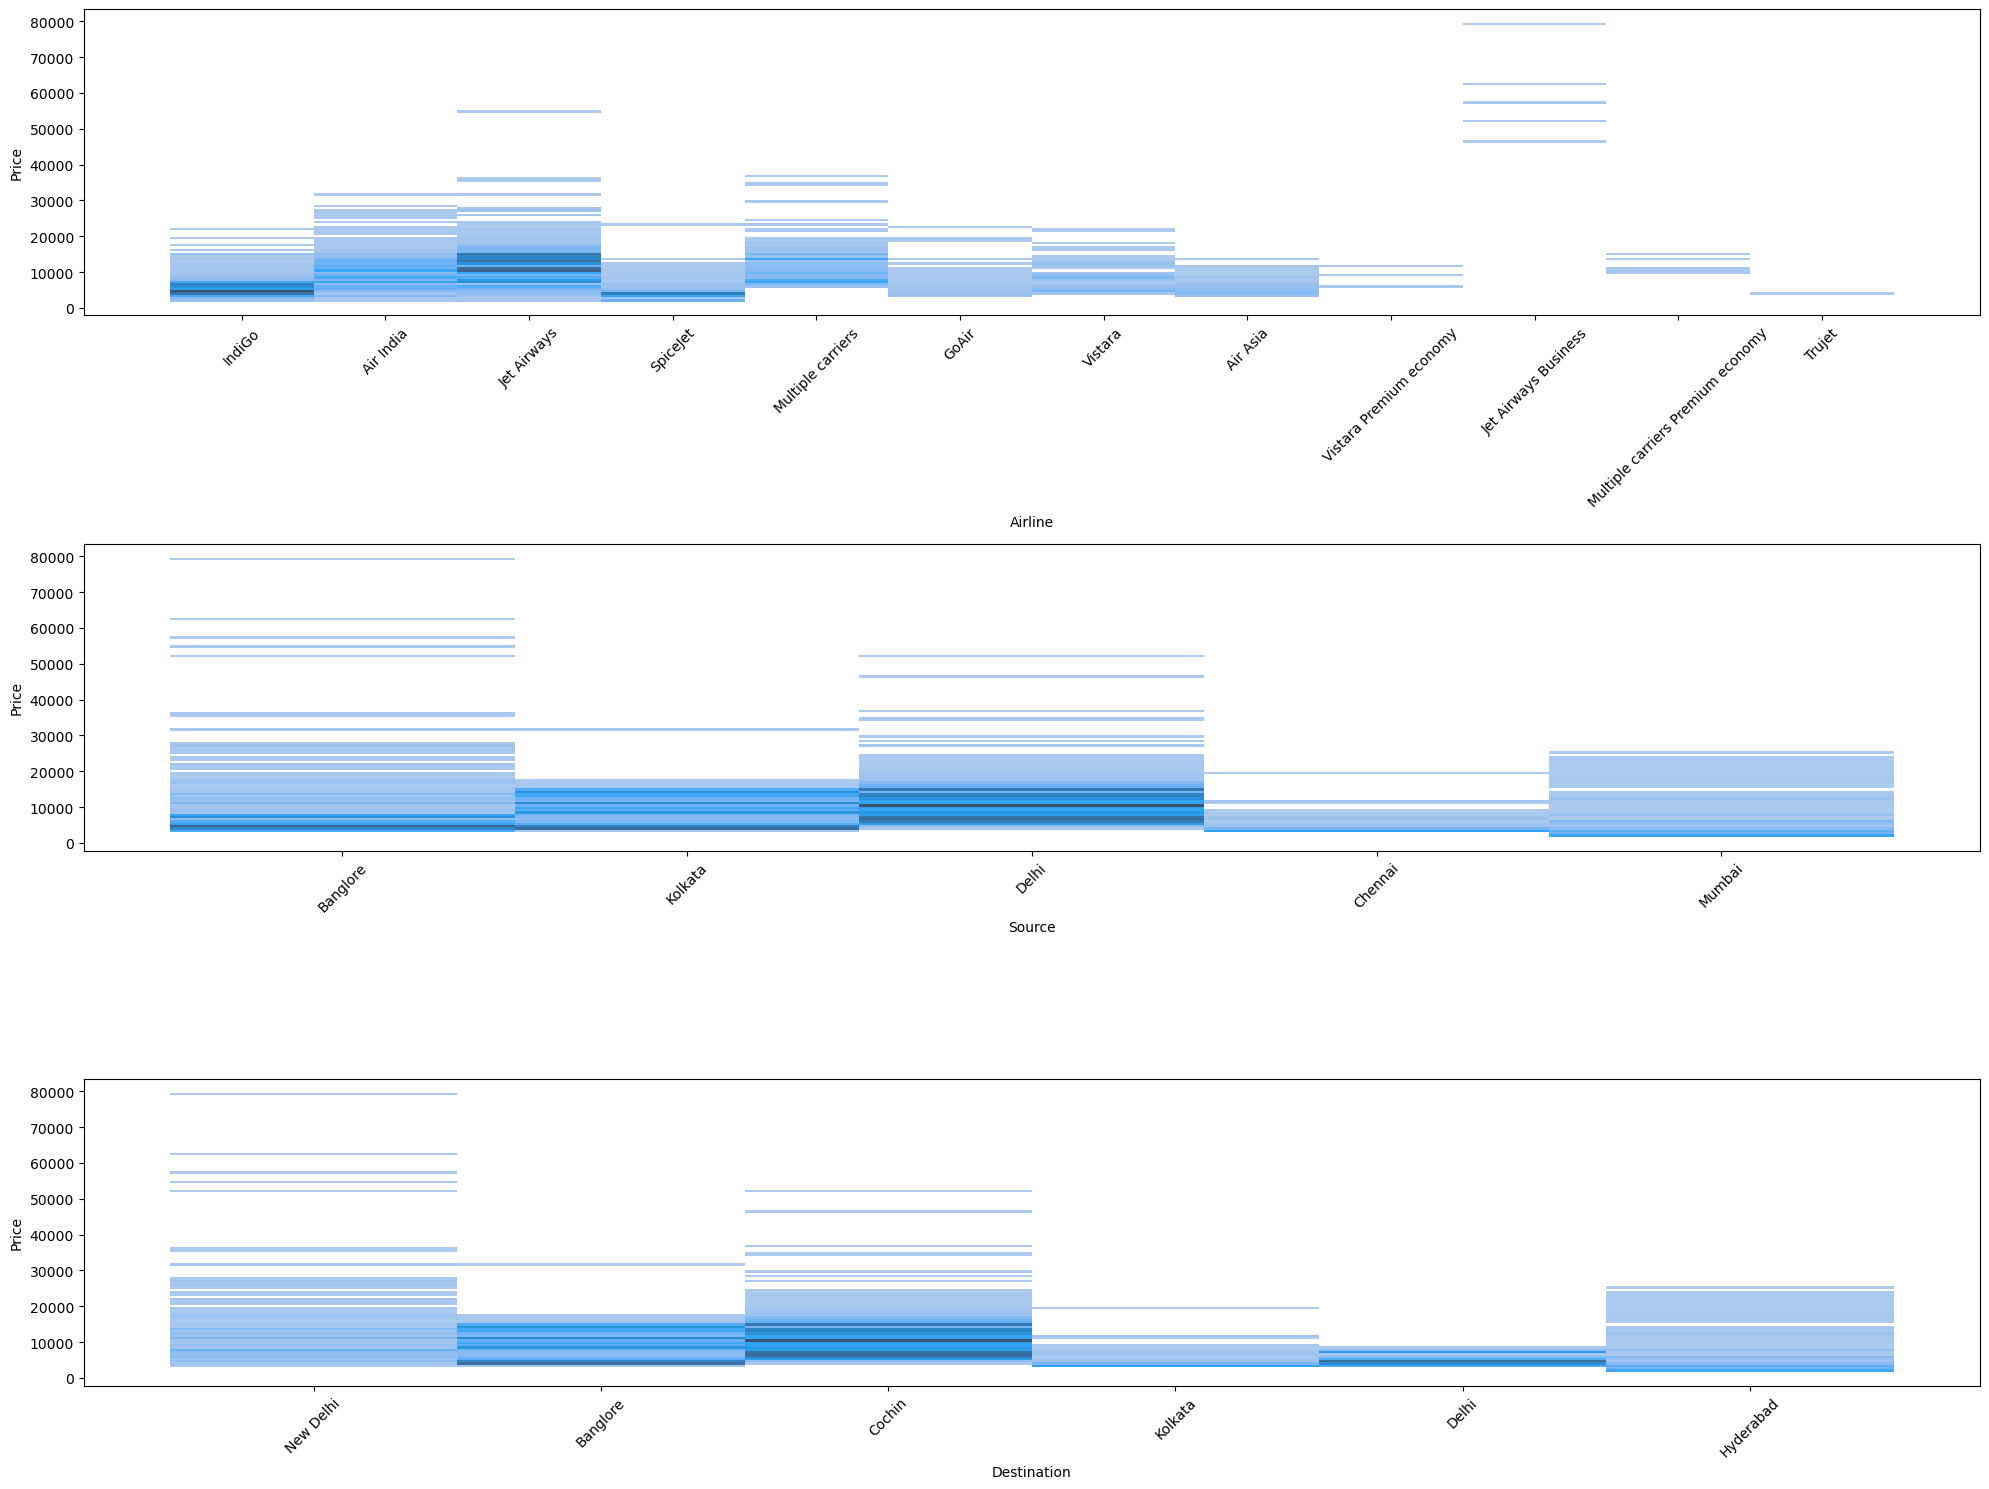

In [ ]:
plt.figure(figsize=(20,15))

for i in range(0, len(cat1)):
    plt.subplot(3,1,i+1)
    sns.histplot(x=data[cat1[i]],y='Price',data=data)
    plt.xlabel(cat1[i])
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

- Jet airways shows highter flight price compare to other Airlines
- Flight price shows maximun between the Banglore and New delhi

## Multivariate Analysis

In [ ]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preprocessing

In [ ]:
## Dropping the rows which has null values

data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Checking if there are any Duplicate values
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [ ]:
# Drop duplicates value

data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.shape ## Now Duplicate values are removed from dataset

(10462, 11)

In [ ]:
def duration_convert(duration):
    if len(duration.split ()) == 2:
        hours = int(duration.split()[0][: -1])
        minutes = int(duration.split()[1][: -1])
        return hours * 60 + minutes
    else:
        return int(duration[: -1]) * 60

data['Duration']=data['Duration'].apply(duration_convert)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [ ]:
# to_datetime is to convert year/month/day
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data.head()

data['Date']=data["Date_of_Journey"].dt.day #dt is to get access of the column 03-24
data['Month']=data["Date_of_Journey"].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1


In [ ]:
## Now split "Dep_Time" & "Arrival_Time" columns into hour and minute

data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.head()

data["Arr_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
## Now remove "Dep_Time","Arrival_Time" and "Date_of_Journey"

data.drop('Dep_Time',axis=1,inplace=True)
data.drop('Arrival_Time',axis=1,inplace=True)
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
data.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
## Now converting categorical values into numerical

le = LabelEncoder()
data['Airline'] = le.fit_transform(data['Airline'])
data['Source'] = le.fit_transform(data['Source'])
data['Destination'] = le.fit_transform(data['Destination'])
data.head()



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,4,2,1,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,3,3,0,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,3,0,5,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
data.corr()

,Airline,Source,Destination,Duration,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
Airline,1.000000,-0.012172,0.015942,-0.153697,-0.036491,0.031915,-0.008680,-0.032267,-0.062421,-0.005438,-0.073045
Source,-0.012172,1.000000,-0.589992,0.162914,0.013796,0.007833,0.062742,0.060218,-0.056609,0.028257,0.021392
Destination,0.015942,-0.589992,1.000000,-0.254198,-0.065875,-0.051797,-0.104578,-0.074056,0.128523,-0.044605,0.016351
Duration,-0.153697,0.162914,-0.254198,1.000000,0.501886,-0.047321,0.056340,-0.001251,-0.019150,0.061937,-0.070878
Price,-0.036491,0.013796,-0.065875,0.501886,1.000000,-0.171142,0.008662,0.005155,-0.024155,0.031023,-0.086163
Date,0.031915,0.007833,-0.051797,-0.047321,-0.171142,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622
Month,-0.008680,0.062742,-0.104578,0.056340,0.008662,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619
Dep_hour,-0.032267,0.060218,-0.074056,-0.001251,0.005155,-0.007617,0.028462,1.000000,-0.015068,-0.003827,0.072989
Dep_min,-0.062421,-0.056609,0.128523,-0.019150,-0.024155,-0.013512,0.001922,-0.015068,1.000000,0.046564,-0.021353
Arr_hour,-0.005438,0.028257,-0.044605,0.061937,0.031023,-0.001133,-0.003041,-0.003827,0.046564,1.000000,-0.152036


<Axes: >

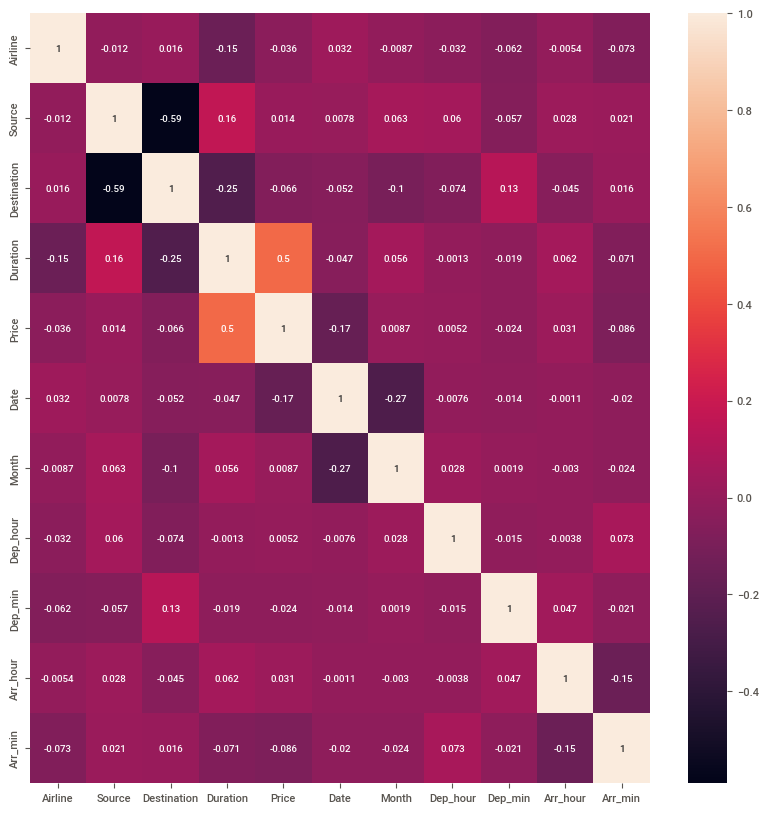

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(),annot=True,annot_kws={"size":7})


In [ ]:
data.drop('Route',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,170,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,445,2 stops,No info,7662,5,1,5,50,13,15
2,4,2,1,1140,2 stops,No info,13882,6,9,9,25,4,25
3,3,3,0,325,1 stop,No info,6218,5,12,18,5,23,30
4,3,0,5,285,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
data.drop('Additional_Info',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,170,non-stop,3897,24,3,22,20,1,10
1,1,3,0,445,2 stops,7662,5,1,5,50,13,15
2,4,2,1,1140,2 stops,13882,6,9,9,25,4,25
3,3,3,0,325,1 stop,6218,5,12,18,5,23,30
4,3,0,5,285,1 stop,13302,3,1,16,50,21,35


In [ ]:
le = LabelEncoder()
data['Total_Stops'] = le.fit_transform(data['Total_Stops'])
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,170,4,3897,24,3,22,20,1,10
1,1,3,0,445,1,7662,5,1,5,50,13,15
2,4,2,1,1140,1,13882,6,9,9,25,4,25
3,3,3,0,325,0,6218,5,12,18,5,23,30
4,3,0,5,285,0,13302,3,1,16,50,21,35


In [ ]:
x=data.drop('Price',axis=1)
y=data[['Price']]

In [ ]:
data.Airline.unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [ ]:
data.Source.unique()

array([0, 3, 2, 1, 4])

In [ ]:
data.Destination.unique()

array([5, 0, 1, 4, 2, 3])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
x_train.shape

(8369, 11)

In [ ]:
x_test.shape

(2093, 11)

## Model Building

### Linear Regression Model

In [ ]:
#initialise model
model = LinearRegression()
#train model with x_train,y_train
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[10107.81475539],
       [ 4705.85010185],
       [ 5739.77230312],
       ...,
       [ 5384.18784677],
       [ 5740.03497986],
       [11904.50750191]])

In [ ]:
y_test

,Price
3773,8285
8264,3807
7135,4632
3951,14178
1671,3597
...,...
2618,54826
3089,11992
1066,3807
6943,6121


In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.349222738553137

In [ ]:
adj_r2= 1-(1-0.40) *(2093-1) / (2093-11-1) # 60 is shape of y_test data
adj_r2

0.396828447861605

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
MSE

16235824.594959756

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2596.5300146550317

In [ ]:
#Iterating n_neighbors from 1 to 10 to get best value of K
error_rate = []
for i in range(1,11):
    KNN = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    KNN.fit(x_train, y_train)
    x_pred = KNN.predict(x_test)
    error = sqrt(mean_squared_error(y_test,x_pred))
    error_rate.append(error)

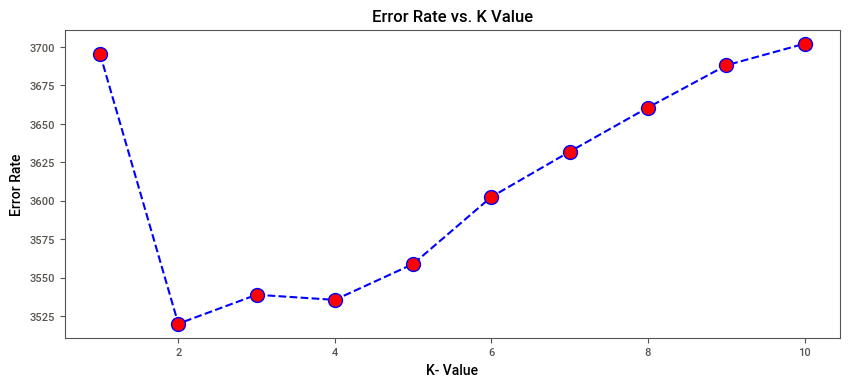

In [ ]:
#Plotting the error rate So,that we can choose the value of K using Elbow Method
plt.figure(figsize=(10,4))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K- Value')
plt.ylabel('Error Rate')
None

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10,scoring="neg_root_mean_squared_error")
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [ ]:
model.best_score_

-3046.718752256447